## 🎓 Persona : Léa, jeune investisseuse étudiante

**Profil :**
- 👩 24 ans, diplômée de l'EM Lyon
- 💼 Première expérience professionnelle après 2 ans d'alternance
- 💰 Aide parentale pour le financement + épargne personnelle (~15 000 €)
- 🎯 Objectif : réaliser un **premier investissement locatif** dans une **ville étudiante dynamique**

---

### 💡 Objectif d'investissement
> Trouver le **meilleur investissement locatif étudiant** possible avec un **budget global de 200 000 €**,  
> en analysant la rentabilité brute dans les **principales villes étudiantes françaises** (studios et T1 ≤45m²)

---

### 💰 Hypothèses financières
| Élément | Montant estimé |
|----------|----------------|
| Prix d'achat visé | 160 000 – 180 000 € |
| Apport personnel | 15 000 € |
| Prêt immobilier estimé | 180 000 € sur 20 ans |
| Budget total (frais inclus) | **≈ 200 000 €** |
| Objectif de rentabilité brute | **≥ 5 %** |

---

### 🔍 Besoins data de Léa
- Évaluer le **taux de vacance locative** en France pour anticiper les périodes creuses (notamment l'été où les étudiants quittent les logements)
- Visualiser les **villes à forte concentration étudiante** en France
- Analyser l'**évolution du prix au m² à l'achat et des loyers étudiants** en France
- Etudier **la rentabilité moyenne en France** en 2024
- Analyser la **dynamique du marché immobilier local : croissance ou baisse des prix et loyers sur les 5 dernières années** (entre Rennes et Bordeaux)
- Comparer **les quartiers les plus rentables (rentabilité brute)** à ?
- Analyser la **localisation/nombre des transports en commun** pour identifier les zones les plus attractives pour les étudiants à ?
- Analyser la **localisation des universités/grandes écoles** à ?
- Analyser les **quartiers vivants (nombre de resto, bars, et supermarchés)** à ? 
- Fournir une **recommandation finale : "où investir avec 200k€ ?"**

---

### 🧭 Objectif du notebook
Créer un outil interactif permettant à Léa de :
1. Analyser la **rentabilité locative brute** pour appartements étudiants ≤45m² dans **23 grandes villes françaises**
2. Explorer visuellement les **villes à forte concentration étudiante** et analyser les **taux de vacance locative**
3. Obtenir un **classement des villes** par rentabilité, prix et loyers pour décider où investir avec 200k€

## 📚 Import des bibliothèques ##

# 2e vision : Analyse resserrée sur des villes #

### Analyser la **dynamique du marché immobilier local : croissance ou baisse des prix et loyers sur les 5 dernières années** (entre Rennes et Bordeaux) ###

In [8]:
print("Partie Axel")

Partie Axel


### Comparer **les quartiers les plus rentables (rentabilité brute)** à ? ###

,Zone_calcul,loyer_mensuel_median,moyenne_loyer_mensuel,surface_moyenne,nombre_logements,Quartier,Catégorie_surface_environ,Type_habitat,Statut,Nb de pièces,Prix_m2,Prix_total,rentabilite_brute_%
3,L3500.1.04,430.0,426.0,30.0,434.5,Nord Saint Martin,30.0,Appartement,neuf,1,4790.0,143700.0,3.590814
4,L3500.1.05,401.0,413.0,28.0,391.0,Maurepas-Patton,30.0,Appartement,neuf,1,4684.0,140520.0,3.424424
0,L3500.1.01,435.0,443.5,25.0,953.5,Centre,30.0,Appartement,neuf,1,5357.0,160710.0,3.248087
2,L3500.1.03,399.0,404.0,25.0,513.0,Lorient-Saint Brieuc,30.0,Appartement,neuf,1,5226.0,156780.0,3.053961
8,L3500.1.04,533.0,538.5,44.0,691.5,Nord Saint Martin,45.0,Appartement,neuf,2,4790.0,215550.0,2.967293
9,L3500.1.05,510.5,520.0,44.5,1202.5,Maurepas-Patton,45.0,Appartement,neuf,2,4684.0,210780.0,2.906348
1,L3500.1.02,425.0,433.0,26.0,562.0,Thabor-Saint Helier,30.0,Appartement,neuf,1,5897.0,176910.0,2.882822
5,L3500.1.01,576.0,605.0,43.0,1471.0,Centre,45.0,Appartement,neuf,2,5357.0,241065.0,2.867276
7,L3500.1.03,521.0,536.0,41.0,1388.0,Lorient-Saint Brieuc,45.0,Appartement,neuf,2,5226.0,235170.0,2.658502
10,L3500.1.06,498.0,500.0,44.0,1076.0,Atalante Beaulieu,45.0,Appartement,neuf,2,5536.0,249120.0,2.398844


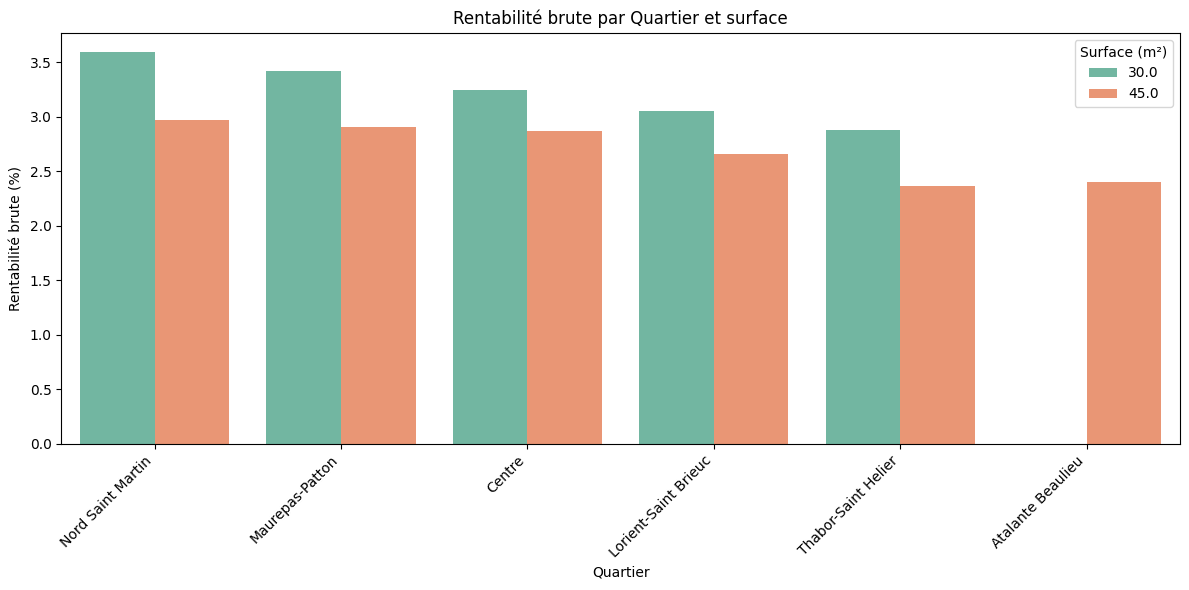

In [3]:
import requests, zipfile, io
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
BDD = "https://huggingface.co/datasets/analysedonneesfoncieresdata/analyse_fonciere_data/resolve/main"

df = pd.read_csv(f"{BDD}/rennes_quartiers.csv.txt", sep=",")
r = requests.get(f"{BDD}/data_loyer.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
fichier_csv = 'data_loyer/Base_OP_2024_L3500_Rennes.csv'
df2 = pd.read_csv(z.open(fichier_csv), encoding="latin-1", sep=";")
df2.columns = df2.columns.str.strip()
df.columns = df.columns.str.strip()
df['Nb de pièces'] = df['Nb de pièces'].astype(int)
df['Surface (m²)'] = df['Surface (m²)'].astype(float)
df['Prix au m² (€)'] = df['Prix au m² (€)'].astype(float)
df['Prix total estimé (€)'] = df['Prix total estimé (€)'].astype(float)
df_etudiants = df[(df['Type de bien'] == 'Appartement') & (df['Surface (m²)'] <= 45) & (df['Statut'] == 'neuf')]
df2 = df2[((df2['Type_habitat'] == 'Appartement') | (df2['nombre_pieces_homogene'] == 'Appart 1P') | (df2['nombre_pieces_homogene'] == 'Appart 2P')) & (df2['surface_moyenne'] < 50)]
df2 = df2.sort_values(by="moyenne_loyer_mensuel")
df2 = df2[df2['nombre_logements'].notna() & (df2['nombre_logements'] != 0)]
mapping_zones = {
    "L3500.1.01": "Centre",
    "L3500.1.02": "Thabor-Saint Helier",
    "L3500.1.03": "Lorient-Saint Brieuc",
    "L3500.1.04": "Nord Saint Martin",
    "L3500.1.05": "Maurepas-Patton",
    "L3500.1.06": "Atalante Beaulieu",
    "L3500.1.07": "Francisco-Vern-Poterie",
    "L3500.1.08": "Sud Gare",
    "L3500.1.09": "Cleunay-Arsenal Redon",
    "L3500.1.10": "Villejean-Beauregard",
    "L3500.1.11": "Le Blosne",
    "L3500.1.12": "Bréquigny"
}
df2["Quartier"] = df2["Zone_calcul"].map(mapping_zones).fillna("Inconnu")
df_etudiants = df_etudiants.rename(columns={
    "Type de bien": "Type_habitat",
    "Surface (m²)": "surface_moyenne",
    "Prix au m² (€)": "Prix_m2",
    "Prix total estimé (€)": "Prix_total"
})
plages = [
    (20, 35, "30"),
    (35, 50, "45")
]
colonnes_numeriques = [
    "loyer_median", "loyer_moyen",
    "loyer_mensuel_median", "moyenne_loyer_mensuel",
    "surface_moyenne", "nombre_logements"
]
dfs = []
for bas, haut, label in plages:
    df_temp = df2[
        (df2["Type_habitat"] == "Appartement") &
        (df2["surface_moyenne"].between(bas, haut))
    ].copy()
    df_group = (
        df_temp
        .groupby("Zone_calcul", as_index=False)[colonnes_numeriques]
        .median(numeric_only=True)
    )
    df_group["Quartier"] = df_group["Zone_calcul"].map(mapping_zones).fillna("Inconnu")
    df_group["Catégorie_surface_environ"] = label
    dfs.append(df_group)
df_grouped = pd.concat(dfs, ignore_index=True)
df_etudiants = df_etudiants.rename(columns={"surface_moyenne": "Catégorie_surface_environ"})
df_grouped["Catégorie_surface_environ"] = df_grouped["Catégorie_surface_environ"].astype(float)
df_etudiants["Catégorie_surface_environ"] = df_etudiants["Catégorie_surface_environ"].astype(float)
df_merged = pd.merge(
    df_grouped,
    df_etudiants,
    on=["Quartier", "Catégorie_surface_environ"],
    how="left"
)
df_merged['rentabilite_brute_%'] = (df_merged['loyer_mensuel_median'] * 12 / df_merged['Prix_total']) * 100
df_merged = df_merged.sort_values(by=["rentabilite_brute_%"], ascending=False)
display(df_merged)
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_merged,
    x='Quartier',
    y='rentabilite_brute_%',
    hue='Catégorie_surface_environ',
    palette='Set2'
)
plt.ylabel("Rentabilité brute (%)")
plt.xlabel("Quartier")
plt.title("Rentabilité brute par Quartier et surface")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Surface (m²)")
plt.tight_layout()
plt.show()

### Analyser la **localisation/nombre des transports en commun** pour identifier les zones les plus attractives pour les étudiants à ?  ###

In [12]:
print("Partie Valentine")

Partie Valentine


### Analyser la **localisation des universités/grandes écoles** à ? ###

In [11]:
print("Partie Adam")

Partie Adam


### Analyser les **quartiers vivants (nombre de resto, bars, et supermarchés)** à ? ###

In [10]:
print("Partie Adam et Valentine")

Partie Adam et Valentine
